In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-test-scores-of-students/test_scores.csv


In [2]:
df = pd.read_csv("/kaggle/input/predict-test-scores-of-students/test_scores.csv")

In [3]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
df.dropna().shape # -> there is no empty items in df

(2133, 11)

<AxesSubplot:>

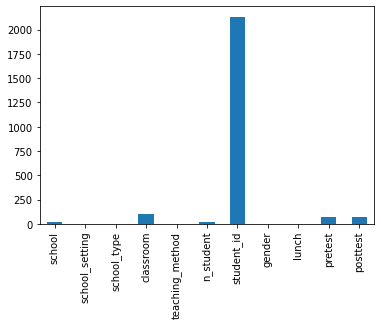

In [6]:
df.nunique().plot(kind = "bar")# 

In [7]:
tm = df["teaching_method"]
df.nunique()

school               23
school_setting        3
school_type           2
classroom            97
teaching_method       2
n_student            18
student_id         2133
gender                2
lunch                 2
pretest              69
posttest             68
dtype: int64

In [8]:
tm.value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

In [9]:
df["school"].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [10]:
df["lunch"].value_counts()

Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64

In [11]:
df2 = pd.get_dummies(df,columns=["school_setting"],prefix=["school_setting"])
df2

,school,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,school_setting_Rural,school_setting_Suburban,school_setting_Urban
0,ANKYI,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,0,0,1
1,ANKYI,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,0,0,1
2,ANKYI,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,0,0,1
3,ANKYI,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,0,0,1
4,ANKYI,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0,0,0,1
2129,ZOWMK,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0,0,0,1
2130,ZOWMK,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0,0,0,1
2131,ZOWMK,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0,0,0,1


In [12]:
list1 = ["school_setting_Rural","school_setting_Suburban","school_setting_Urban"]

In [13]:
for item in list1:
    print(df2[item].corr(df2["posttest"])) 


-0.12231609209152111
0.45470356141765467
-0.3289974740213824


In [14]:
# max results on tests
pretest = df["pretest"]
posttest = df["posttest"]
np.max(pretest), np.max(posttest)

(93.0, 100.0)

In [15]:
avg_pre = pretest.mean()
avg_post = posttest.mean()

In [16]:
np.sum(pretest>avg_pre),np.sum(posttest > avg_post)

(1126, 1080)

In [17]:
np.sum(pretest == 93) ,np.sum(posttest == 100)

(1, 8)

In [18]:
df.iloc[np.argmax(pretest), :] # best pretest student

school                        IDGFP
school_setting                Urban
school_type              Non-public
classroom                       P2A
teaching_method        Experimental
n_student                      17.0
student_id                    QXTHU
gender                         Male
lunch              Does not qualify
pretest                        93.0
posttest                      100.0
Name: 908, dtype: object

In [19]:
# best posttest students
indexnames = df[df["posttest"] != 100].index 
df.drop(indexnames) 

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
902,IDGFP,Urban,Non-public,P2A,Experimental,17.0,BYVSP,Male,Does not qualify,86.0,100.0
903,IDGFP,Urban,Non-public,P2A,Experimental,17.0,D9SR6,Female,Does not qualify,83.0,100.0
905,IDGFP,Urban,Non-public,P2A,Experimental,17.0,K5955,Male,Does not qualify,85.0,100.0
907,IDGFP,Urban,Non-public,P2A,Experimental,17.0,P32P9,Male,Does not qualify,83.0,100.0
908,IDGFP,Urban,Non-public,P2A,Experimental,17.0,QXTHU,Male,Does not qualify,93.0,100.0
909,IDGFP,Urban,Non-public,P2A,Experimental,17.0,RG9R4,Male,Does not qualify,83.0,100.0
911,IDGFP,Urban,Non-public,P2A,Experimental,17.0,SH2DM,Male,Does not qualify,88.0,100.0
915,IDGFP,Urban,Non-public,P2A,Experimental,17.0,W4KYQ,Female,Does not qualify,81.0,100.0


In [20]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000



# **Visualisation**

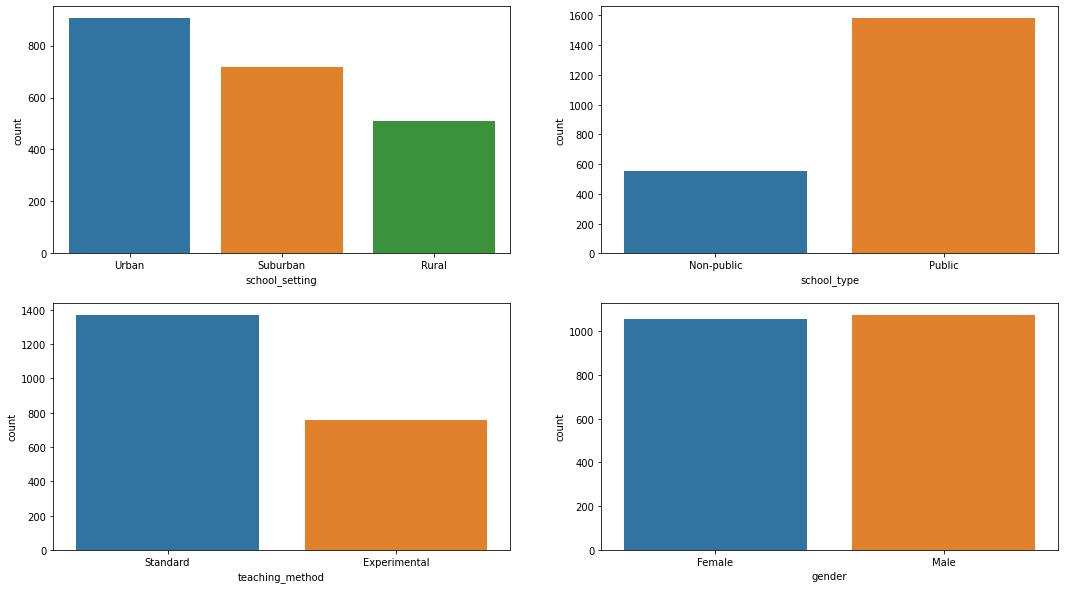

In [21]:
c = 0
list2 = [df.school_setting,df.school_type,df.teaching_method,df.gender]
fig, axes = plt.pyplot.subplots(2, 2, figsize=(18, 10))
for i in range(2):
    for j in range(2):
        sns.countplot(ax=axes[i,j],x = list2[c])
        c+=1


<AxesSubplot:xlabel='pretest', ylabel='Count'>

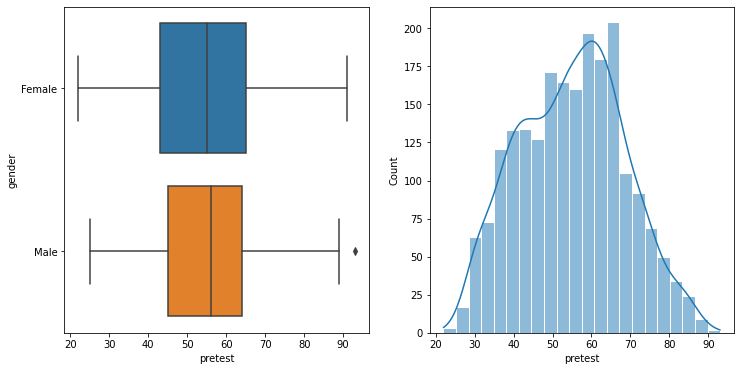

In [22]:
fig,(ax1,ax2) = plt.pyplot.subplots(1,2,figsize=(12,6))
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.boxplot(x=df.pretest,y = df.gender,ax =ax1)
sns.histplot(x = df.pretest, ax =ax2,kde = True)

<AxesSubplot:xlabel='posttest', ylabel='Count'>

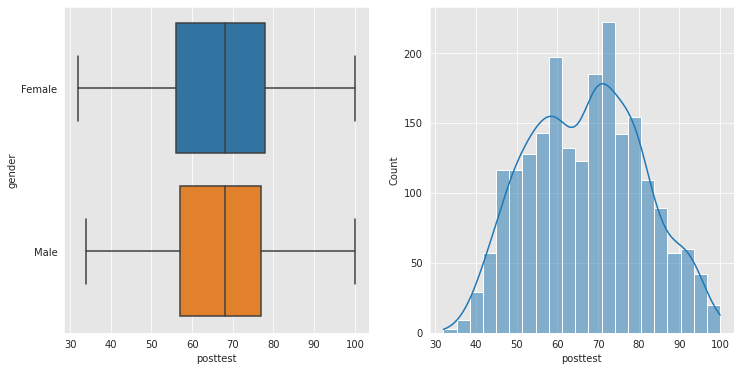

In [23]:
fig,(ax1,ax2) = plt.pyplot.subplots(1,2,figsize=(12,6))
sns.boxplot(x=df.posttest,y = df.gender,ax =ax1)
sns.histplot(x = df.posttest, ax =ax2,kde = True)

<AxesSubplot:>

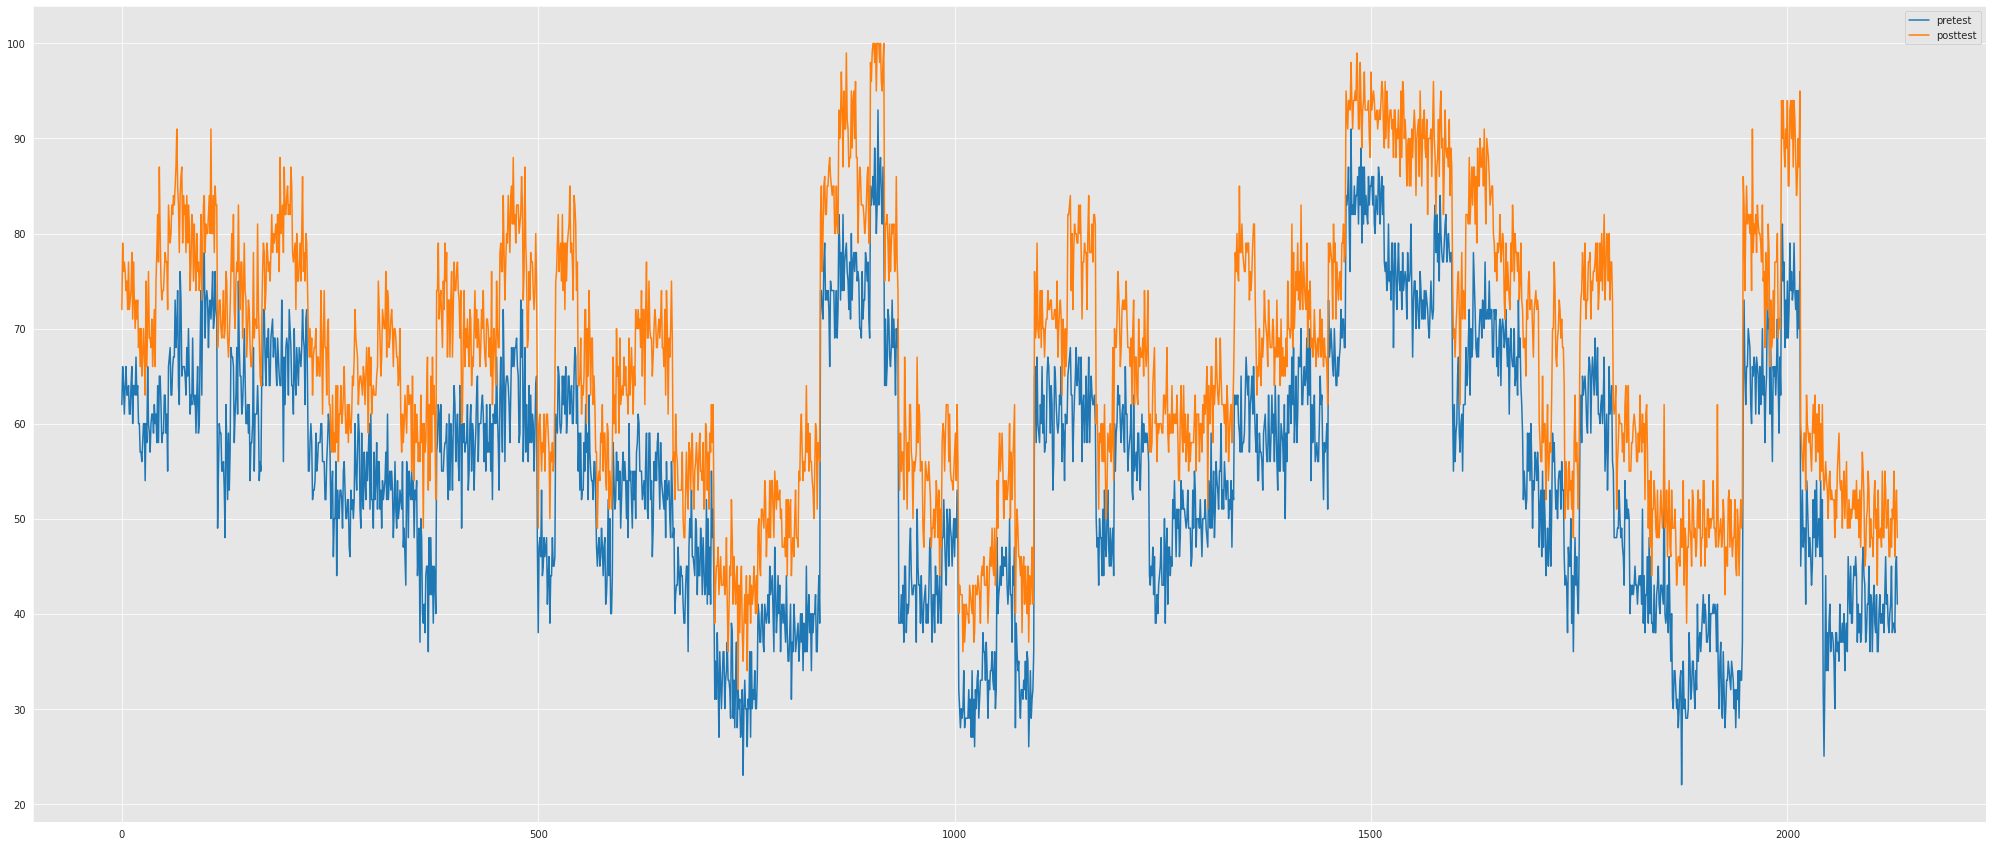

In [24]:
# seems, that pretest scores strongly correlate with posttest scores 
df[["pretest","posttest"]].plot(figsize = (35,15))

In [25]:
df["pretest"].corr(df["posttest"]) # we were right

0.9508842857175765

# Machine learning part

In [26]:
# quick look at data again
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


We got some categorial features, so have to encode them to continue 

In [27]:
# Split the data into X and y
X = df.drop(['posttest','classroom','student_id'], axis = 1)
y = df['posttest']

# Convert categorical values to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categories = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categories)],
                                remainder = 'passthrough')

X_transformed = transformer.fit_transform(X)

# Split the transformed data to training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2)

# Import the Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.9497005049200704

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size = 0.18)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9417323306912454

In [31]:
cv_score = cross_val_score(model,X_transformed,y)
np.mean(cv_score)

0.8585438525161839

# Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
X = df.drop(['posttest','classroom','student_id'], axis = 1)
y = df['posttest']

# Convert categorical values to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categories = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categories)],
                                remainder = 'passthrough')

X_transformed = transformer.fit_transform(X)

# Split the transformed data to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2)

grid = {"n_estimators" : [1,10,50,100,200,500,800,1200,3000],'max_depth' : [None,5,10,20,30],'max_features' : ['auto', 'sqrt']}

tuned_model = RandomizedSearchCV(estimator = model,param_distributions = grid,n_iter=15,cv=7,verbose=2 )
tuned_model.fit(X_train,y_train)

Fitting 7 folds for each of 15 candidates, totalling 105 fits
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................
[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................
[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................
[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................
[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................
[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................
[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, max_features=sqrt, max_depth=5 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. n_estimators=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  n_estimators=100, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  n_estimators=100, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  n_estimators=100, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  n_estimators=100, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  n_estimators=100, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  n_estimators=100, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=100, max_features=auto, max_depth=30 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  8.5min finished


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [1, 10, 50, 100, 200,
                                                         500, 800, 1200,
                                                         3000]},
                   verbose=2)

In [33]:
tuned_model.best_params_

{'n_estimators': 1200, 'max_features': 'auto', 'max_depth': 5}

In [34]:
y_pred = tuned_model.predict(X_test)

In [35]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)

0.9429534880951087

In [36]:
mse = mean_squared_error(y_test, y_pred)
mse

11.20898239161764